<a id='serialtime'></a>
# Measuring $t_{serial}$ 

Let's say you parallelized your program, compiled it and want to calculate speed-up. As you know, you will have to measure the execution time of the parallel program, and the execution time of the serial program. 

If we set the thread number to 1 in the parallel program we essentially serialize our parallel program. 

The question arises, whether it is even necessary to write and compile the serial version of the program. Can you just set threads=1 in your parallel program? Or does this distort our results?

**Let's find out!** 

The following code will measure the execution time of the parallel fibonacci program with different amounts of threads. To get a more complete picture, we measure the execution time first on the full program run, and then on the algorithm only (see notebook `./compare_timemeasuring_methods`). Then we will measure the execution times of the serial program version. This will allow us to graphically compare the different calculations we get for speed-up. 

In [ ]:
cd ~/performance/programs/fibonacci

In [10]:
# of full programm run: measure time with 5 repeats
time1 = []
threads = [1,4,8,16,24,32,48,64]
timeit_object = %timeit -o -n 1 -r 5 -q ! ./notiming.o 1 >/dev/null
time1.append(timeit_object.best)
timeit_object = %timeit -o -n 1 -r 5 -q ! ./notiming.o 4 >/dev/null
time1.append(timeit_object.best) 
timeit_object = %timeit -o -n 1 -r 5 -q ! ./notiming.o 8 >/dev/null
time1.append(timeit_object.best) 
timeit_object = %timeit -o -n 1 -r 5 -q ! ./notiming.o 16 >/dev/null
time1.append(timeit_object.best)
timeit_object = %timeit -o -n 1 -r 5 -q ! ./notiming.o 24 >/dev/null
time1.append(timeit_object.best)
timeit_object = %timeit -o -n 1 -r 5 -q ! ./notiming.o 32 >/dev/null
time1.append(timeit_object.best)
timeit_object = %timeit -o -n 1 -r 5 -q ! ./notiming.o 48 >/dev/null
time1.append(timeit_object.best)
timeit_object = %timeit -o -n 1 -r 5 -q ! ./notiming.o 64 >/dev/null
time1.append(timeit_object.best)

# measure serial execution time
timeit_object = %timeit -o -n 1 -r 5 -q ! ./notiming_serial.o >/dev/null
serial1 = timeit_object.best

In [11]:
# of algorithm only: measure time with 5 repeats
import numpy as np
time2 = []
threads = [1,4,8,16,24,32,48,64]
! ./timing.o 1 5 >/dev/null
time2.append(np.genfromtxt('/tmp/time.txt'))
! ./timing.o 4 5 >/dev/null
time2.append(np.genfromtxt('/tmp/time.txt'))
! ./timing.o 8 5 >/dev/null
time2.append(np.genfromtxt('/tmp/time.txt'))
! ./timing.o 16 5 >/dev/null
time2.append(np.genfromtxt('/tmp/time.txt'))
! ./timing.o 24 5 >/dev/null
time2.append(np.genfromtxt('/tmp/time.txt'))
! ./timing.o 32 5 >/dev/null
time2.append(np.genfromtxt('/tmp/time.txt'))
! ./timing.o 48 5 >/dev/null
time2.append(np.genfromtxt('/tmp/time.txt'))
! ./timing.o 64 5 >/dev/null
time2.append(np.genfromtxt('/tmp/time.txt'))

# measure serial execution time
! ./timing_serial.o 5 >/dev/null
serial2 = np.genfromtxt('/tmp/time.txt')

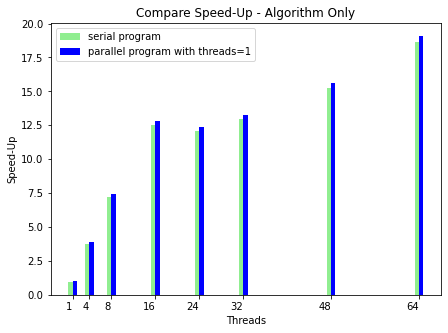

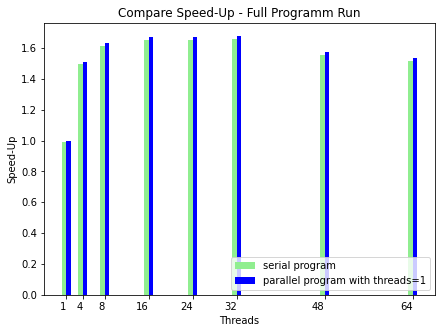

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# calculate speed-up
speedup1 = np.ones(len(threads))*serial1/np.array(time1)
speedup2 = np.ones(len(threads))*serial2/np.array(time2)
lazyspeedup1 = np.ones(len(threads))*time1[0]/np.array(time1)
lazyspeedup2 = np.ones(len(threads))*time2[0]/np.array(time2)

#plot
fig,ax = plt.subplots(figsize=(7,5))
ax.bar(np.array(threads)-0.4,speedup2,color='lightgreen',label='serial program', align='center', width= 0.8)
ax.bar(np.array(threads)+0.4,lazyspeedup2,color='blue',label='parallel program with threads=1',align='center', width= 0.8)
ax.set_xticks(threads)
ax.set_xticklabels(threads, ha='right')
ax.set_ylabel('Speed-up')
ax.set_xlabel('Threads')
ax.set_title('Compare Speed-up - Algorithm Only')
ax.legend();
fig,ax = plt.subplots(figsize=(7,5))
ax.bar(np.array(threads)-0.4,speedup1,color='lightgreen',label='serial program', align='center', width= 0.8)
ax.bar(np.array(threads)+0.4,lazyspeedup1,color='blue',label='parallel program with threads=1',align='center', width= 0.8)
ax.set_xticks(threads)
ax.set_xticklabels(threads, ha='right')
ax.set_ylabel('Speed-up')
ax.set_xlabel('Threads')
ax.set_title('Compare Speed-up - Full Programm Run')
ax.legend(loc="lower right");

What do you think? Is it ok to just set $threads=1$ in the parallel program, when measuring $t_{serial}$ ? Or do you feel we should write and compile a serial version of the program to measure $t_{serial}$?

In the graphics above, we can see that the difference in speed-up is small and rather constant. 

For educational purposes it seems to be sufficient to use the parallel version of a program with thread number set to 1. In a scientific research project however, it could be necessary to use a serial program version. 